# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('C:/Users/Bill/Downloads/Data Science Case Study Projects/22.1 Stats Frequentist Inference A and B/Frequentist Case Study/insurance2.csv')


In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

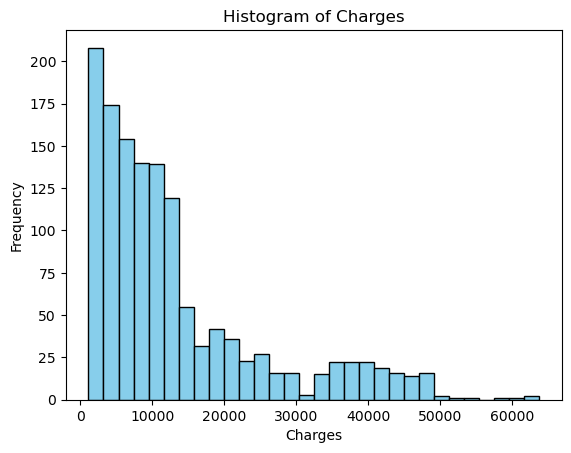

In [6]:
# Plot histogram of 'charges'
plt.hist(medical['charges'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Charges')
plt.show()

In [8]:
# Calculate mean and standard deviation
mean_charges = np.mean(medical['charges'])
std_dev_charges = np.std(medical['charges'], ddof=1)

print(f"Mean Charges: {mean_charges}")
print(f"Standard Deviation of Charges: {std_dev_charges}")

Mean Charges: 13270.422265141257
Standard Deviation of Charges: 12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
With Random Sampling we can be confident we can infer a whole lot of information using statistical inferences.  It's mentioned that the data in question is a random sample and the sample size is large enough.  
The most suitable test to determine whether the actual average charge is below $12,000 would be a one-sample t-test (used to compare sample mean against specific value). 

It accounts for the variability in the sample data by using the sample standard deviation.

If the sample size is relatively small, the t-test is particularly appropriate because it adjusts for smaller samples (though with larger sample sizes, the t-test results approach those of the z-test).


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

A two-sided confidence interval assesses whether the population mean lies within a range, both above and below the sample mean.

A one-sided confidence interval focuses solely on whether the population mean is below or above a specific threshold. Since the administrator is specifically concerned about the average charge being less than $12,000, a one-sided interval is the most relevant.

In [10]:
# Sample statistics (replace with actual values from your dataset)
mean_charges = np.mean(medical['charges'])
std_dev_charges = np.std(medical['charges'], ddof=1)
n = len(medical['charges'])

# Degrees of freedom
df = n - 1

# Critical value for one-tailed 95% confidence level
alpha = 0.05  # Significance level
t_critical = t.ppf(1 - alpha, df)

# One-sided confidence interval lower bound
lower_bound = mean_charges - t_critical * (std_dev_charges / np.sqrt(n))

print(f"Critical value (t_critical): {t_critical}")
print(f"Lower bound of 95% confidence interval: {lower_bound}")

Critical value (t_critical): 1.6459941145571317
Lower bound of 95% confidence interval: 12725.48718381623


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
For the pooled standard deviation formula to be valid, we are assuming that the variances of the two groups are equal

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [28]:
from scipy.stats import t, ttest_ind

# Load the dataset
medical = pd.read_csv(r'C:\Users\Bill\Downloads\Data Science Case Study Projects\22.1 Stats Frequentist Inference A and B\Frequentist Case Study/insurance2.csv')

# Split into groups: charges for people with and without insurance
charges_without_insurance = medical[medical['insuranceclaim'] == 0]['charges']
charges_with_insurance = medical[medical['insuranceclaim'] == 1]['charges']

# Sample statistics
n0 = len(charges_without_insurance)  # Sample size for no insurance
n1 = len(charges_with_insurance)  # Sample size for insurance
mean0 = np.mean(charges_without_insurance)  # Mean for no insurance
mean1 = np.mean(charges_with_insurance)  # Mean for insurance
std0 = np.std(charges_without_insurance, ddof=1)  # Std dev for no insurance
std1 = np.std(charges_with_insurance, ddof=1)  # Std dev for insurance

# Calculate pooled standard deviation
sp = np.sqrt(((n0 - 1) * std0**2 + (n1 - 1) * std1**2) / (n0 + n1 - 2))

# Calculate t-statistic
t_stat = (mean0 - mean1) / (sp * np.sqrt(1/n0 + 1/n1))

# Degrees of freedom
df = n0 + n1 - 2

# Calculate p-value (two-tailed)
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

print(f"Manual Calculation:")
print(f"Sample size (no insurance): {n0}, Sample size (insurance): {n1}")
print(f"Mean (no insurance): {mean0:.2f}, Mean (insurance): {mean1:.2f}")
print(f"Std dev (no insurance): {std0:.2f}, Std dev (insurance): {std1:.2f}")
print(f"Pooled Std Dev: {sp:.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Perform t-test using scipy
t_stat_scipy, p_value_scipy = ttest_ind(charges_without_insurance, charges_with_insurance, equal_var=True)

print(f"\nUsing scipy.stats.ttest_ind:")
print(f"T-statistic: {t_stat_scipy:.4f}")
print(f"P-value: {p_value_scipy:.4f}")

Manual Calculation:
Sample size (no insurance): 555, Sample size (insurance): 783
Mean (no insurance): 8821.42, Mean (insurance): 16423.93
Std dev (no insurance): 6446.51, Std dev (insurance): 14045.93
Pooled Std Dev: 11520.03
T-statistic: -11.8933
P-value: 0.0000

Using scipy.stats.ttest_ind:
T-statistic: -11.8933
P-value: 0.0000


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

No Direct z-test in scipy.stats

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test